# NORD POOL electricity price prediction (PP9)
## Predicting Electricity Prices Using LSTM and GRU Networks.  
This project focuses on forecasting hourly electricity prices for May 2024 using data from the [Nord Pool Group's website](https://data.nordpoolgroup.com/auction/day-ahead/system?deliveryDate=latest&currency=EUR). The initial phase involved generating an Excel file with a pre-filled time column for two months using Python. Subsequently, the relevant market data—specifically, hourly system prices and turnovers—were manually collected from the website and populated into the Excel file. Although this approach was manageable for a small dataset, for larger or ongoing projects, implementing web scraping or leveraging an API would enhance efficiency.

The core of this project employs Long short-term memory and Gated Recurrent Unit (GRU) networks, a types of recurrent neural networks suitable for sequence prediction tasks. LSTMs and GRUs are particularly adept at capturing temporal dynamics, making them usable for predicting time-series data. By training the LSTM and GRU model on historical data, the project aims to provide 1 hour ahead forecasts.

## Get data

In [1]:
#!pip install openpyxl

In [2]:
import pandas as pd

# Load the data from the Excel file
file_path = 'market_data.xlsx'
data = pd.read_excel(file_path)

# Display data types of each column
print("Data Types of Each Column:")
print(data.dtypes)
print("\n")

# Display general information about the DataFrame
print("General Information about the DataFrame:")
data.info()
print("\n")

# Display descriptive statistics of the DataFrame
print("Descriptive Statistics of the DataFrame:")
print(data.describe())

data

Data Types of Each Column:
Time        datetime64[ns]
Price              float64
Turnover           float64
dtype: object


General Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Time      1511 non-null   datetime64[ns]
 1   Price     1511 non-null   float64       
 2   Turnover  1511 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 35.5 KB


Descriptive Statistics of the DataFrame:
                      Time        Price      Turnover
count                 1511  1511.000000   1511.000000
mean   2024-04-04 12:00:00    52.381946  44300.040106
min    2024-03-04 01:00:00    -4.160000  33934.900000
25%    2024-03-19 18:30:00    43.515000  40811.950000
50%    2024-04-04 12:00:00    54.070000  44290.900000
75%    2024-04-20 05:30:00    63.095000  47752.050000
max    2024-05-05 

,Time,Price,Turnover
0,2024-03-04 01:00:00,58.26,45924.4
1,2024-03-04 02:00:00,58.28,46015.6
2,2024-03-04 03:00:00,58.17,45746.8
3,2024-03-04 04:00:00,58.20,45926.5
4,2024-03-04 05:00:00,58.25,46549.6
...,...,...,...
1506,2024-05-05 19:00:00,53.31,48155.7
1507,2024-05-05 20:00:00,53.87,48554.0
1508,2024-05-05 21:00:00,53.35,47840.1
1509,2024-05-05 22:00:00,52.70,46345.2


## Visualise data

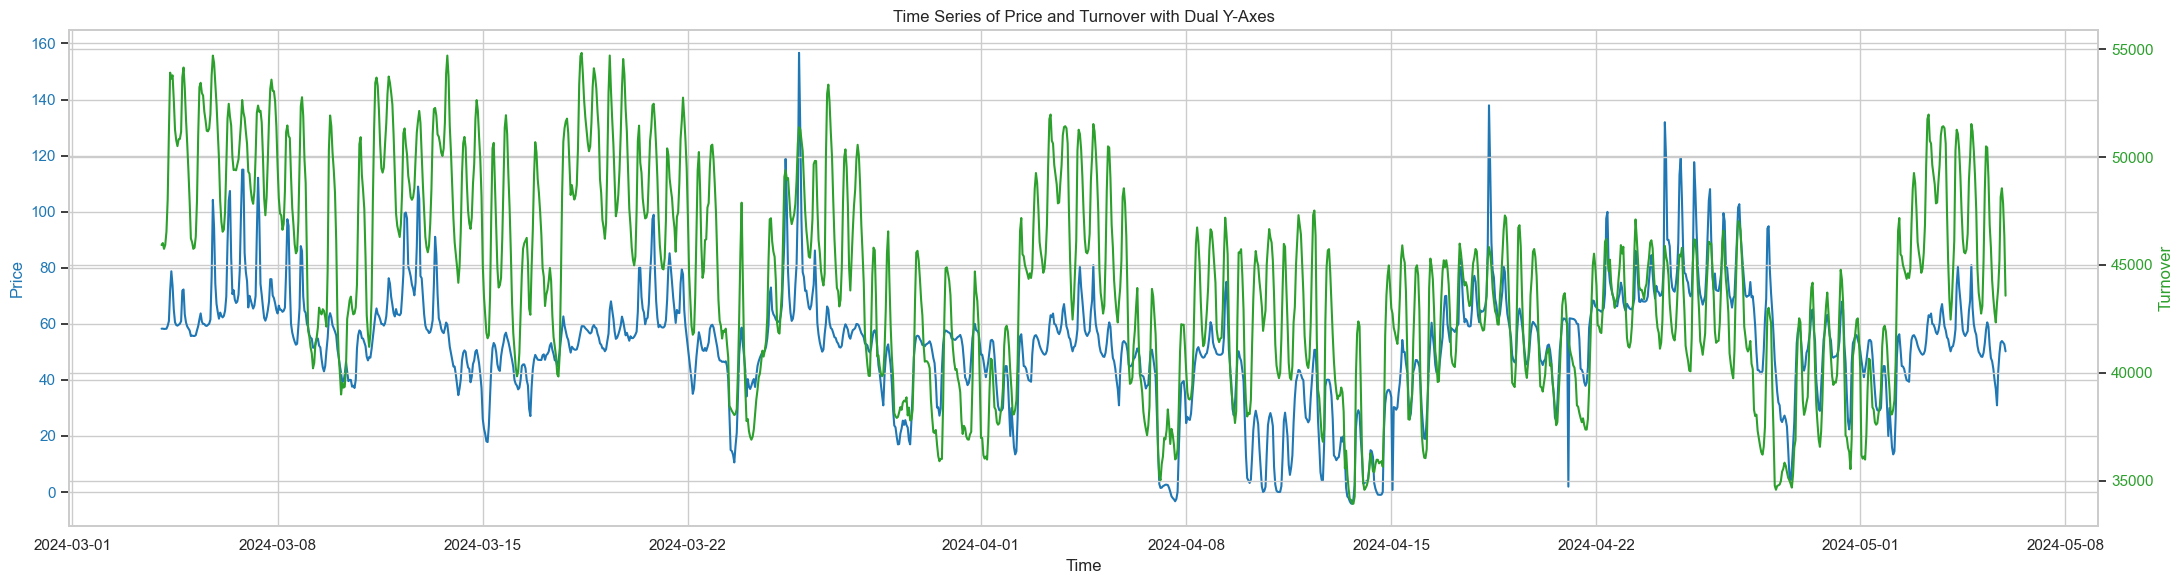

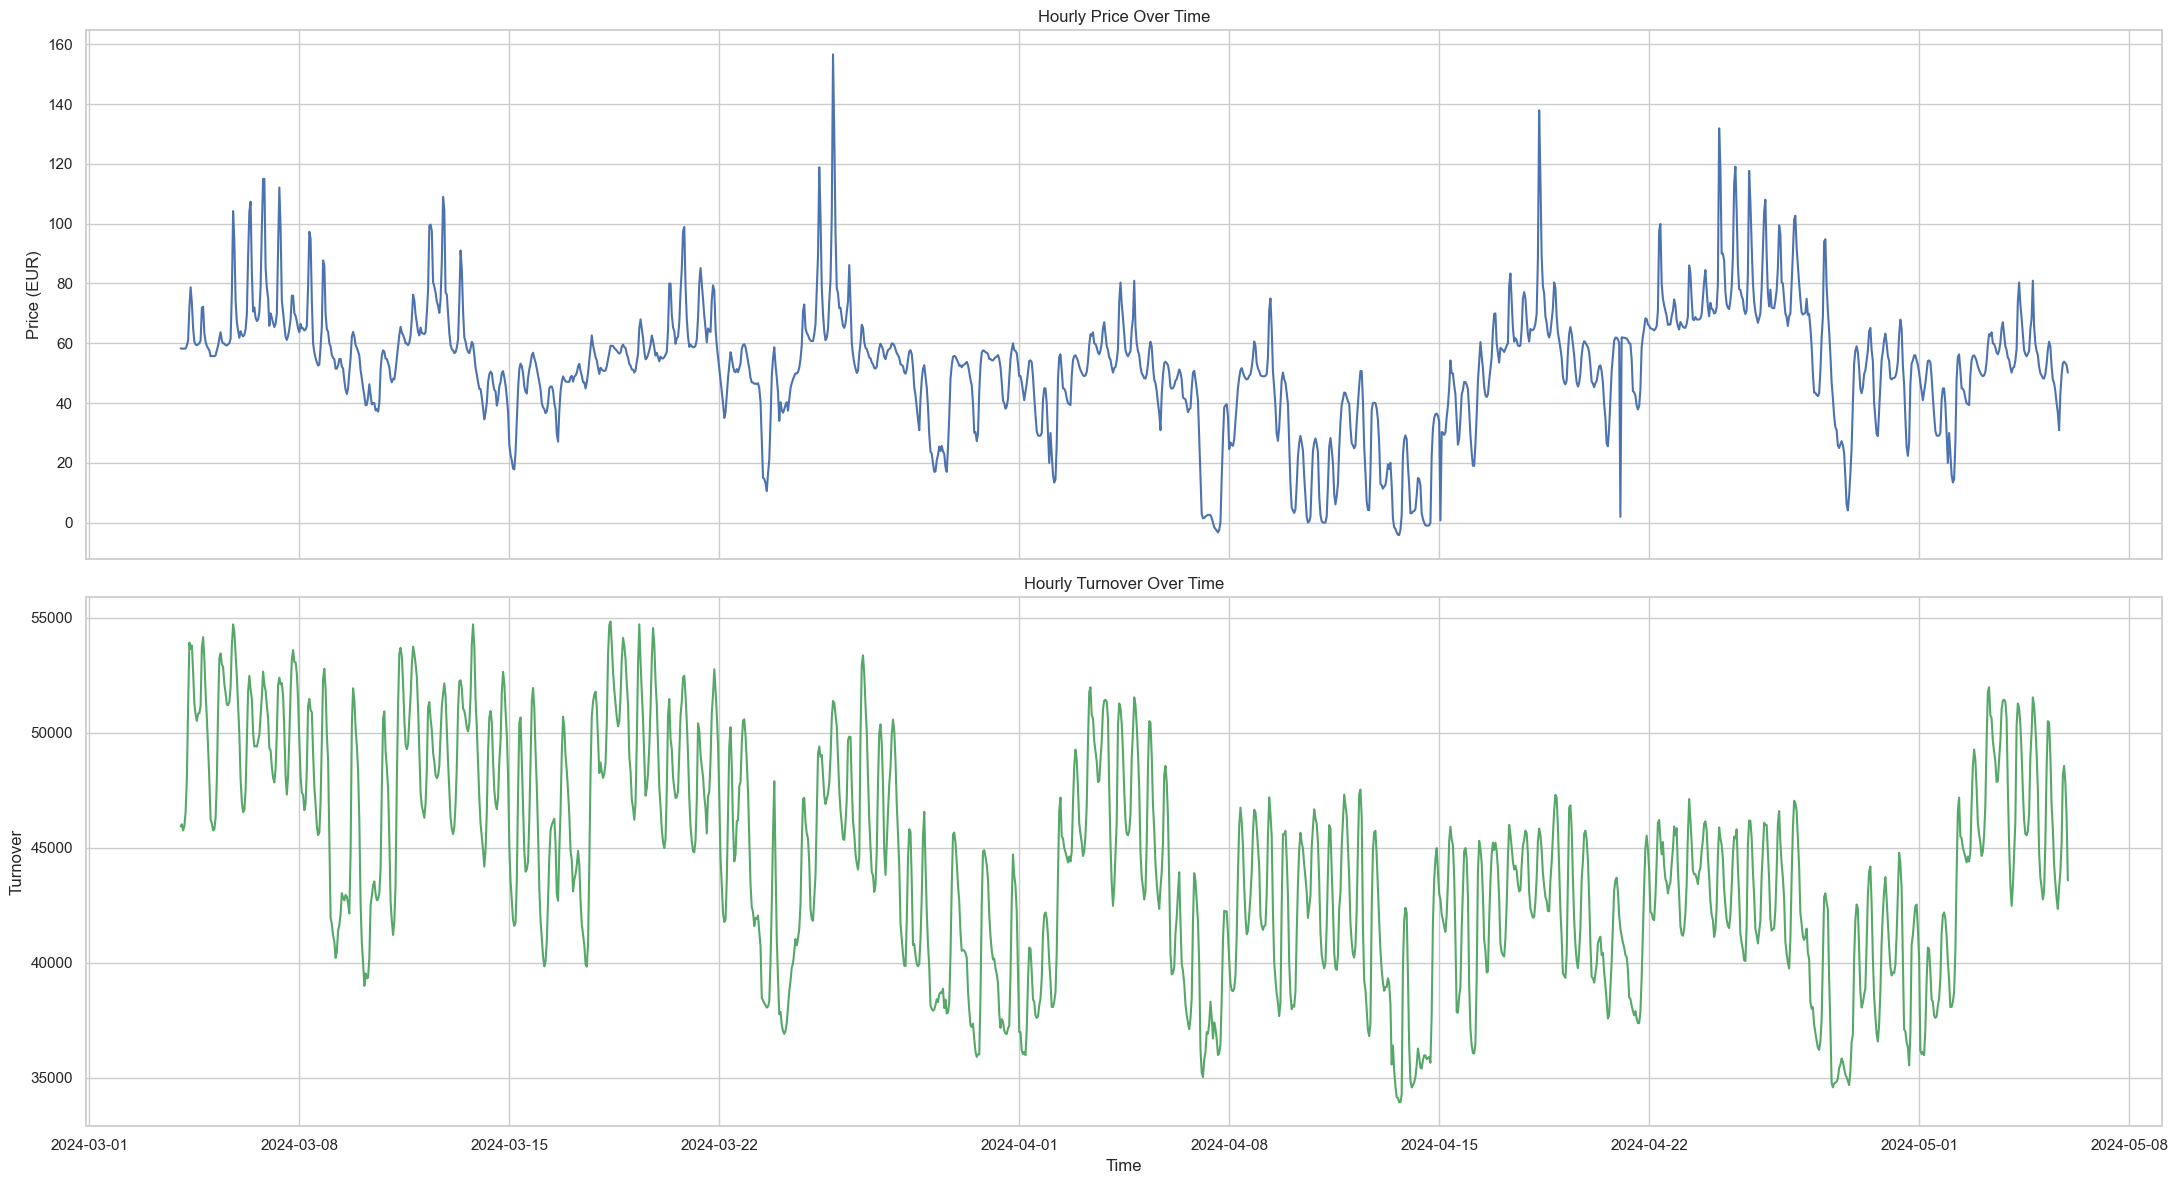

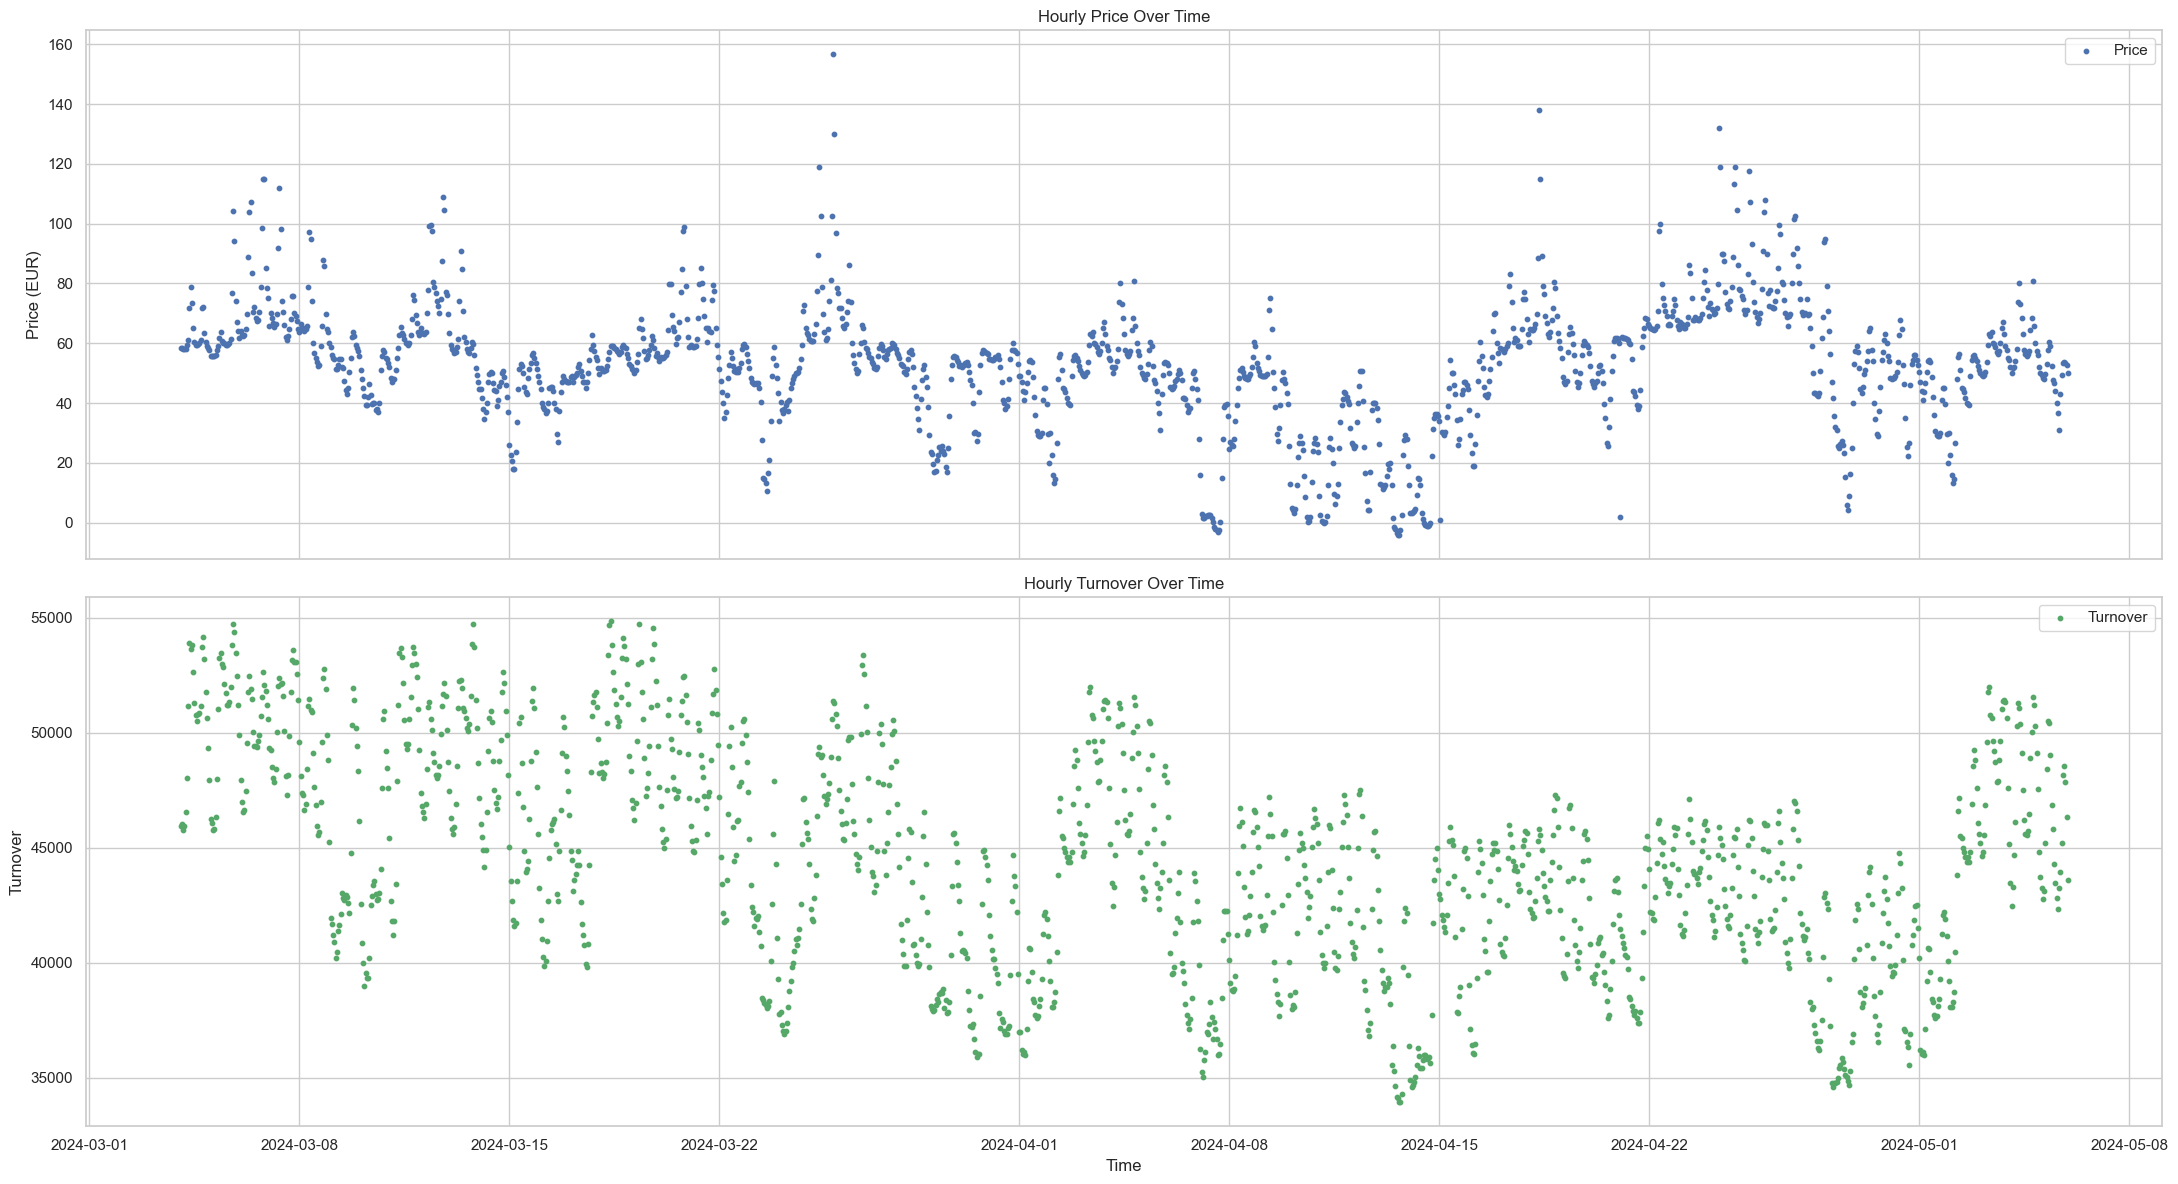

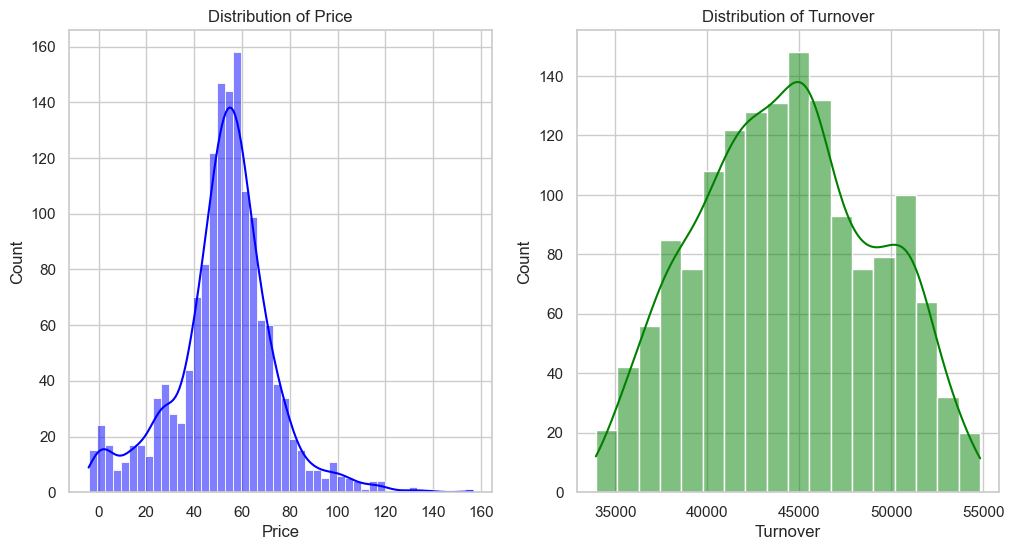

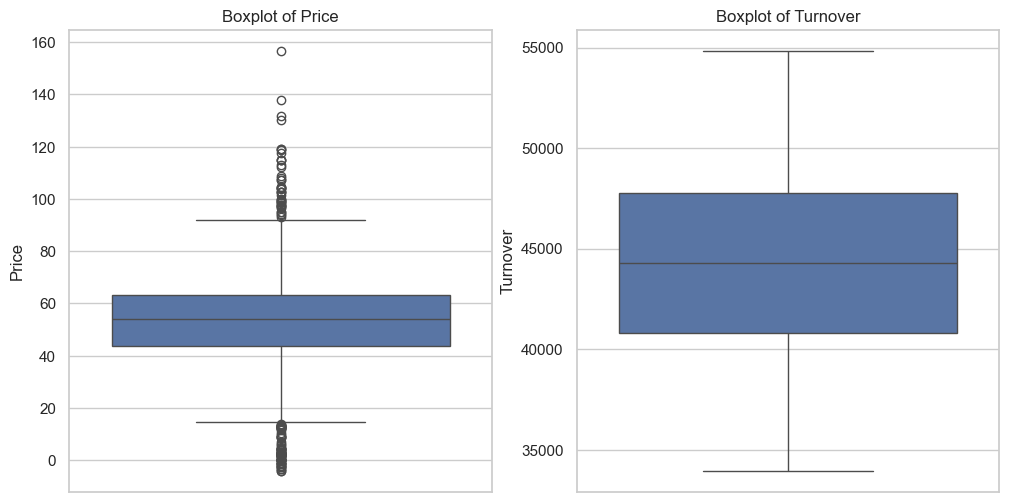

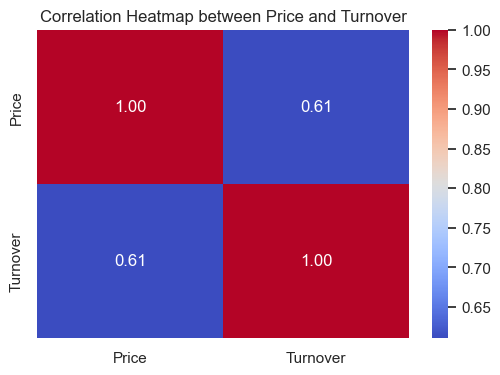

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn plot
sns.set(style="whitegrid")

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(22, 6))

# Plot the Price data
color = 'tab:blue'
ax1.set_xlabel('Time')
ax1.set_ylabel('Price', color=color)
ax1.plot(data['Time'], data['Price'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Turnover data
ax2 = ax1.twinx() 
color = 'tab:green'
ax2.set_ylabel('Turnover', color=color)
ax2.plot(data['Time'], data['Turnover'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Title and show the plot
plt.title('Time Series of Price and Turnover with Dual Y-Axes')
fig.tight_layout()
plt.show()

# Create a figure with two subplots (rows), sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 12), sharex=True)

# Plot Price data on the first subplot
ax1.plot(data['Time'], data['Price'], color='b')
ax1.set_title('Hourly Price Over Time')
ax1.set_ylabel('Price (EUR)')
ax1.grid(True)

# Plot Turnover data on the second subplot
ax2.plot(data['Time'], data['Turnover'], color='g')
ax2.set_title('Hourly Turnover Over Time')
ax2.set_ylabel('Turnover')
ax2.set_xlabel('Time')
ax2.grid(True)

# Improve layout to avoid overlap and ensure clear labels
fig.tight_layout()
plt.show()

# Create a figure with two subplots (rows), sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(22, 12), sharex=True)

# Scatter Price data on the first subplot
ax1.scatter(data['Time'], data['Price'], color='b', marker='o', label='Price', s=10)
ax1.set_title('Hourly Price Over Time')
ax1.set_ylabel('Price (EUR)')
ax1.grid(True)
ax1.legend()

# Scatter Turnover data on the second subplot
ax2.scatter(data['Time'], data['Turnover'], color='g', marker='o', label='Turnover', s=10)
ax2.set_title('Hourly Turnover Over Time')
ax2.set_ylabel('Turnover')
ax2.set_xlabel('Time')
ax2.grid(True)
ax2.legend()

# Improve layout to avoid overlap and ensure clear labels
fig.tight_layout()
plt.show()

# Histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Price'], kde=True, color='blue')
plt.title('Distribution of Price')

plt.subplot(1, 2, 2)
sns.histplot(data['Turnover'], kde=True, color='green')
plt.title('Distribution of Turnover')
plt.show()

# Boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Price'])
plt.title('Boxplot of Price')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['Turnover'])
plt.title('Boxplot of Turnover')
plt.show()

# Correlation Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(data[['Price', 'Turnover']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap between Price and Turnover')
plt.show()


## Prepare data

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Take only price
data = data[['Time', 'Price']]

# Set time as index
data.set_index('Time', inplace=True)

# # Feature Engineering
# data['Hour'] = data.index.hour
# data['DayOfWeek'] = data.index.dayofweek

print(data.shape)
data.head(5)

(1511, 1)


,Price
Time,
2024-03-04 01:00:00,58.26
2024-03-04 02:00:00,58.28
2024-03-04 03:00:00,58.17
2024-03-04 04:00:00,58.20
2024-03-04 05:00:00,58.25


In [5]:
# Split data
train = data[:'2024-04-30']
test = data['2024-05-01':]
print(train.shape, test.shape)

(1391, 1) (120, 1)


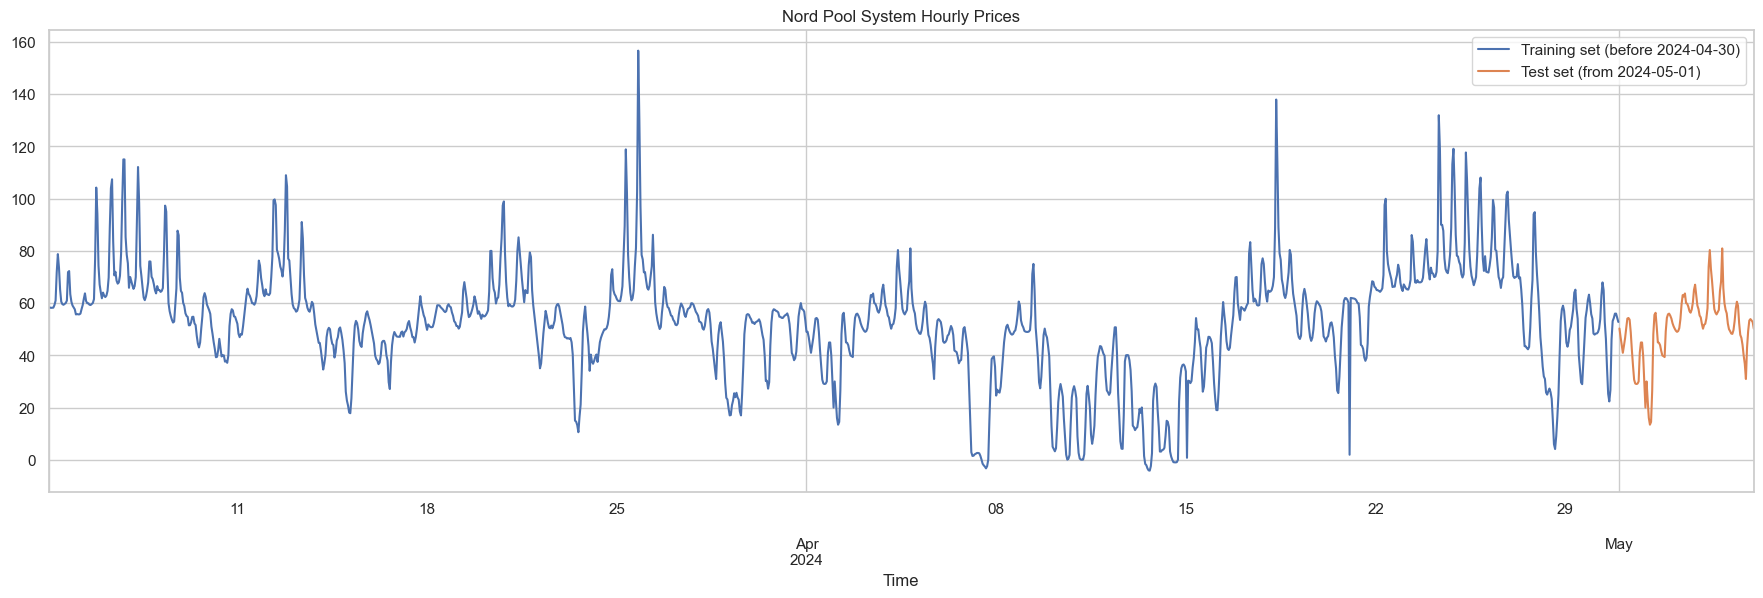

In [6]:
# Visualise train and test
data["Price"][:'2024-04-30'].plot(figsize=(22,6), legend=True)
data["Price"]['2024-05-01':].plot(figsize=(22,6), legend=True)
plt.legend(["Training set (before 2024-04-30)", "Test set (from 2024-05-01)"])
plt.title("Nord Pool System Hourly Prices")
plt.show()

In [7]:
# Scale training set
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train)

In [8]:
# Create sequences
sequence_length = 48

X_train = []
y_train = []

for i in range(sequence_length, train.shape[0]):
    X_train.append(train_scaled[i - sequence_length: i, 0])
    y_train.append(train_scaled[i , 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train[0]

array([0.38818408, 0.38830846, 0.38762438, 0.38781095, 0.38812189,
       0.39446517, 0.4050995 , 0.47238806, 0.51554726, 0.48333333,
       0.43084577, 0.40242537, 0.39639303, 0.39496269, 0.39707711,
       0.39906716, 0.40497512, 0.47276119, 0.47518657, 0.42021144,
       0.40211443, 0.3931592 , 0.38843284, 0.3840796 , 0.37189055,
       0.37288557, 0.3721393 , 0.37207711, 0.3738806 , 0.38457711,
       0.39409204, 0.40920398, 0.4221393 , 0.40385572, 0.39875622,
       0.39863184, 0.39508706, 0.39440299, 0.39676617, 0.39919154,
       0.40845771, 0.50379353, 0.67394279, 0.61131841, 0.48793532,
       0.4431592 , 0.42512438, 0.41038557])

In [10]:
y_train[0]

0.4239427860696518

In [11]:
print(X_train.shape, y_train.shape)

(1343, 48) (1343,)


In [12]:
# Reshape X_train for model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
print(X_train.shape)

(1343, 48, 1)


# LSTM MODEL

## Define the model

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.optimizers import Adam

input_shape = (X_train.shape[1], X_train.shape[2])

input_layer = Input(shape=input_shape)
lstm1 = LSTM(24, return_sequences=True, activation='linear', dropout=0.0)(input_layer)
lstm2 = LSTM(24, return_sequences=False, activation='linear')(lstm1)
output_layer = Dense(1, activation='linear')(lstm2)

model = Model(inputs=input_layer, outputs=output_layer)

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss=mse, optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 48, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 48, 24)         │         2,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 24)             │         4,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,225 (28.22 KB)

 Trainable params: 7,225 (28.22 KB)

 Non-trainable params: 0 (0.00 B)

## Train the model

In [15]:
history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32,
                    verbose=1)


Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0444 - mae: 0.1734 - val_loss: 0.0118 - val_mae: 0.0843
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0068 - mae: 0.0602 - val_loss: 0.0090 - val_mae: 0.0707
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0061 - mae: 0.0568 - val_loss: 0.0095 - val_mae: 0.0735
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0072 - mae: 0.0626 - val_loss: 0.0088 - val_mae: 0.0727
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0063 - mae: 0.0583 - val_loss: 0.0088 - val_mae: 0.0717
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0057 - mae: 0.0570 - val_loss: 0.0087 - val_mae: 0.0710
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0061 - mae: 0.0581 - val_loss: 0.0093 - val_mae: 0.0723
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0067 - mae: 0.0602 - val_loss: 0.0090 - val_mae: 0.0709
Epoch 9/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.006

## Visualise training

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


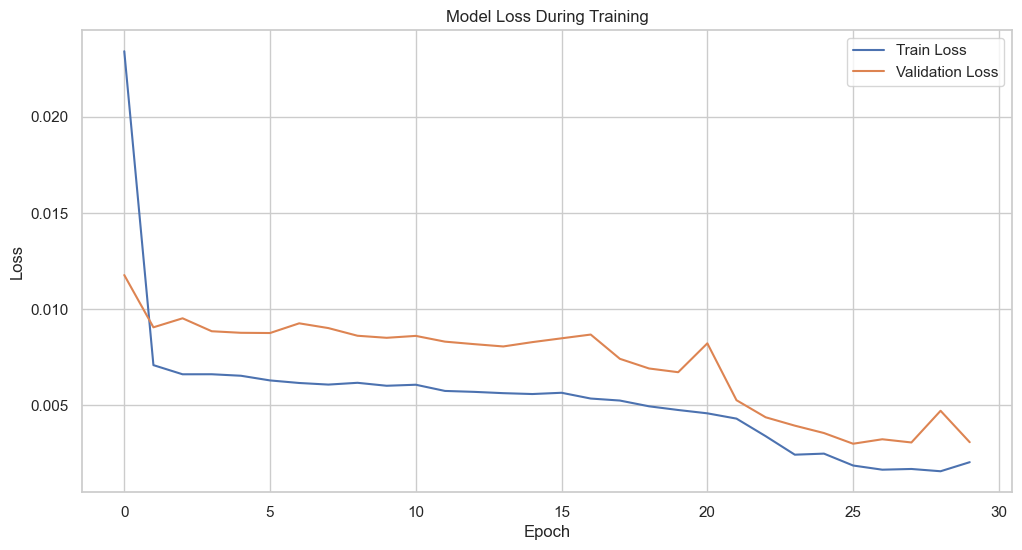

In [16]:
print(history.history.keys())

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Evaluate the model

In [17]:
# Prepare inputs for generating X_test sequences
inputs = data[len(data) - len(test) - sequence_length : ]
print(inputs.shape)
inputs = scaler.transform(inputs)
print(inputs.shape)

(168, 1)
(168, 1)


In [18]:
# Prepare X_test
X_test = []
for i in range(sequence_length, len(inputs)):
    X_test.append(inputs[i - sequence_length: i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(120, 48, 1)

In [19]:
from sklearn.metrics import mean_absolute_error 

# Generate predictions on test data
predictions = model.predict(X_test)
# dummy_array = np.zeros((predictions.shape[0], 3))
# dummy_array[:, 0] = predictions.ravel()
# predictions_original_scale = scaler.inverse_transform(dummy_array)
# final_predictions = predictions_original_scale[:, 0]
predictions = scaler.inverse_transform(predictions)
print(predictions[:10, 0].tolist())
print(test['Price'][:10].tolist())

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
[48.3935546875, 46.542484283447266, 44.217315673828125, 42.316165924072266, 40.40668487548828, 43.10149002075195, 46.32186508178711, 49.89213180541992, 52.93569564819336, 52.753055572509766]
[50.26, 46.93, 44.0, 40.97, 43.68, 46.61, 50.44, 54.06, 54.29, 53.63]


## Visualise results

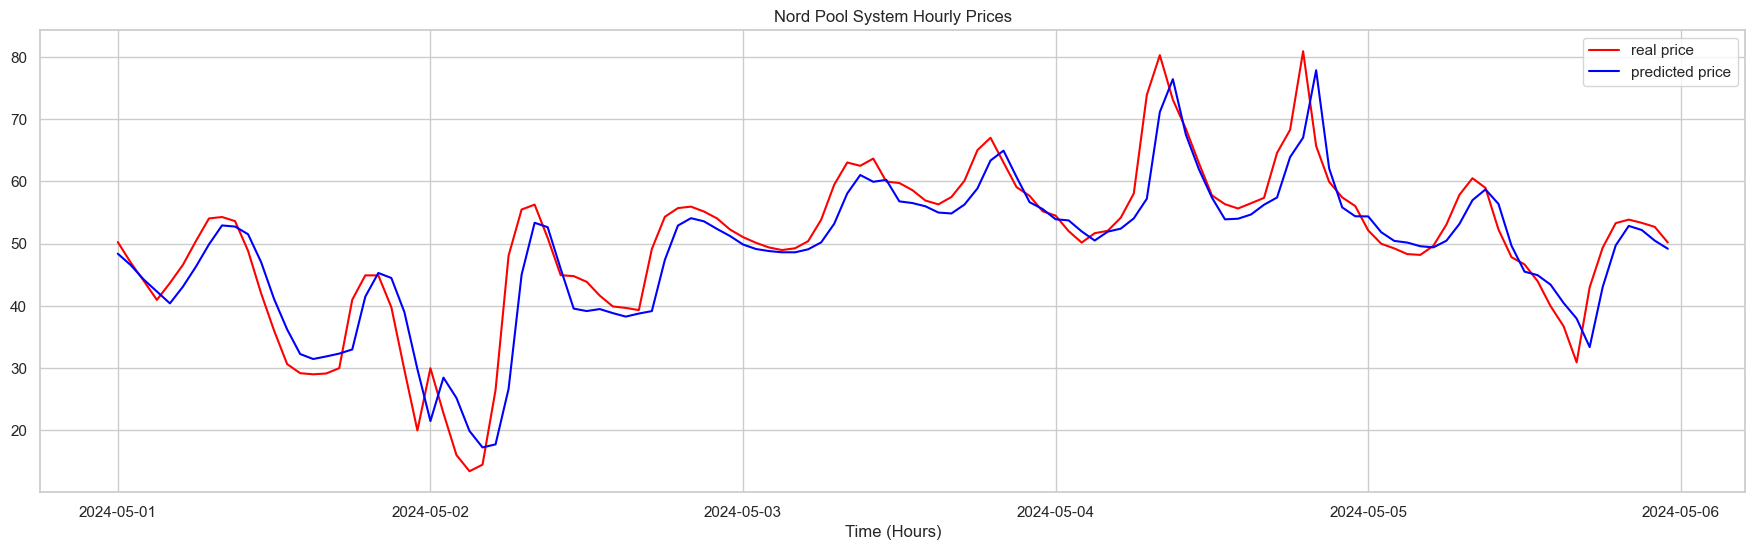

In [20]:
# Visualise only test and prediction data
predictions_flat = predictions.flatten()
predictions_series = pd.Series(predictions_flat, index=test.index)
plt.figure(figsize=(22, 6))
plt.plot(test, color="red", label="real price")
plt.plot(predictions_series, color="blue", label="predicted price")
plt.title("Nord Pool System Hourly Prices")
plt.xlabel("Time (Hours)")
plt.legend()
plt.grid(True)
plt.show()

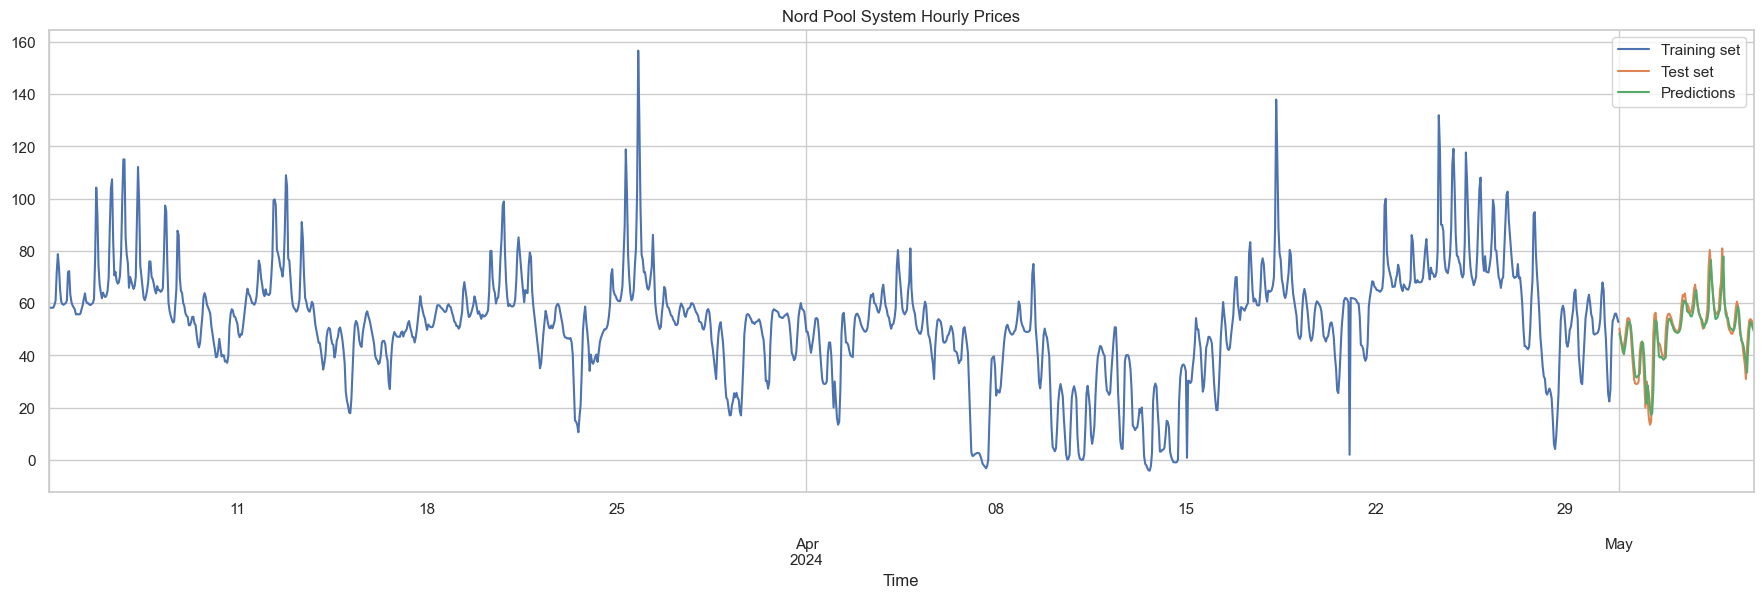

In [21]:
# Visualise whole data
data["Price"][:'2024-04-30'].plot(figsize=(22,6), legend=True)
data["Price"]['2024-05-01':].plot(figsize=(22,6), legend=True)
predictions_series.plot(figsize=(22,6), legend=True)
plt.legend(["Training set", "Test set", "Predictions"])
plt.title("Nord Pool System Hourly Prices")
plt.show()

# GRU MODEL

## Define model

In [22]:
import tensorflow as tf
from tensorflow.keras.layers import Input, GRU, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse
from tensorflow.keras.optimizers import Adam

input_shape = (X_train.shape[1], X_train.shape[2])

input_layer = Input(shape=input_shape)
gru1 = GRU(24, return_sequences=True, activation='linear', dropout=0.0)(input_layer)
gru2 = GRU(24, return_sequences=False, activation='linear')(gru1)
output_layer = Dense(1, activation='linear')(gru2)

model = Model(inputs=input_layer, outputs=output_layer)

learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

model.compile(loss=mse, optimizer=optimizer, metrics=['mae'])
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 48, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 48, 24)         │         1,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 24)             │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,569 (21.75 KB)

 Trainable params: 5,569 (21.75 KB)

 Non-trainable params: 0 (0.00 B)

## Train model

In [23]:
history = model.fit(X_train,
                    y_train,
                    validation_split=0.2,
                    epochs=30,
                    batch_size=32,
                    verbose=1)


Epoch 1/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0447 - mae: 0.1728 - val_loss: 0.0142 - val_mae: 0.0961
Epoch 2/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0066 - mae: 0.0594 - val_loss: 0.0088 - val_mae: 0.0681
Epoch 3/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0057 - mae: 0.0512 - val_loss: 0.0069 - val_mae: 0.0582
Epoch 4/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0051 - mae: 0.0481 - val_loss: 0.0063 - val_mae: 0.0571
Epoch 5/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0039 - mae: 0.0458 - val_loss: 0.0058 - val_mae: 0.0549
Epoch 6/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0034 - mae: 0.0428 - val_loss: 0.0053 - val_mae: 0.0519
Epoch 7/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0037 - mae: 0.0413 - val_loss: 0.0048 - val_mae: 0.0491
Epoch 8/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0031 - mae: 0.0400 - val_loss: 0.0047 - val_mae: 0.0469
Epoch 9/30
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.002

## Visualise training

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


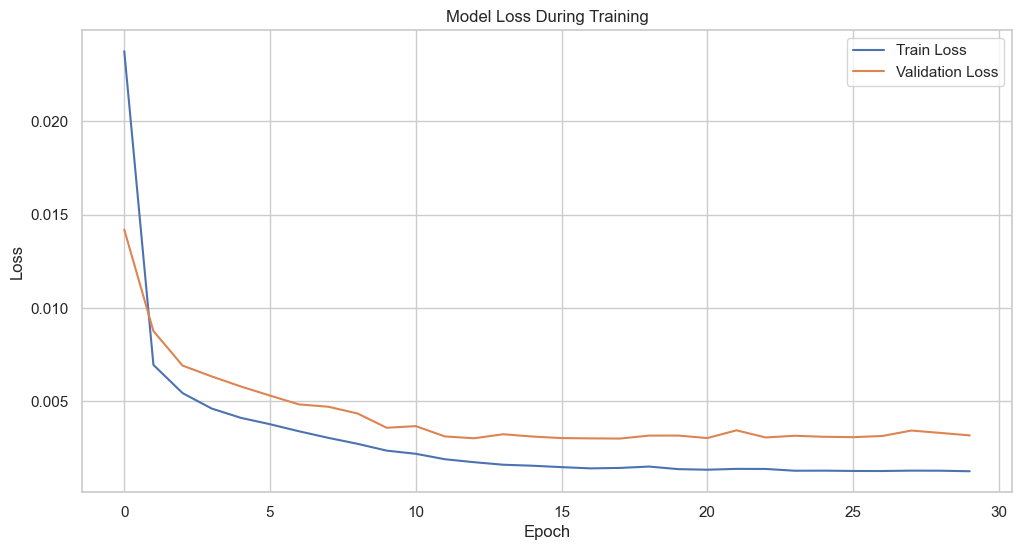

In [24]:
print(history.history.keys())

# Plot training and validation loss (since you have a single output)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error 

# Generate predictions on test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step


## Visualise results

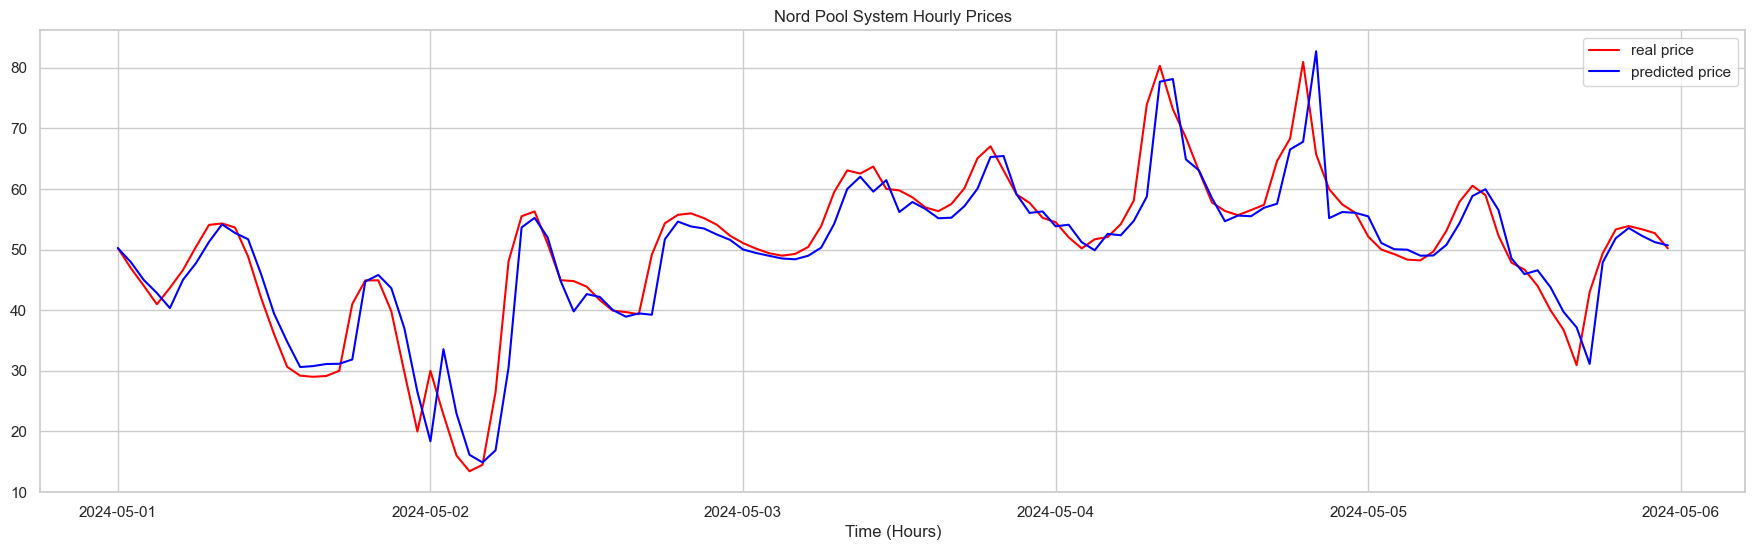

In [26]:
# Visualise only test and prediction data
predictions_flat = predictions.flatten()
predictions_series = pd.Series(predictions_flat, index=test.index)
plt.figure(figsize=(22, 6))
plt.plot(test, color="red", label="real price")
plt.plot(predictions_series, color="blue", label="predicted price")
plt.title("Nord Pool System Hourly Prices")
plt.xlabel("Time (Hours)")
plt.legend()
plt.grid(True)
plt.show()

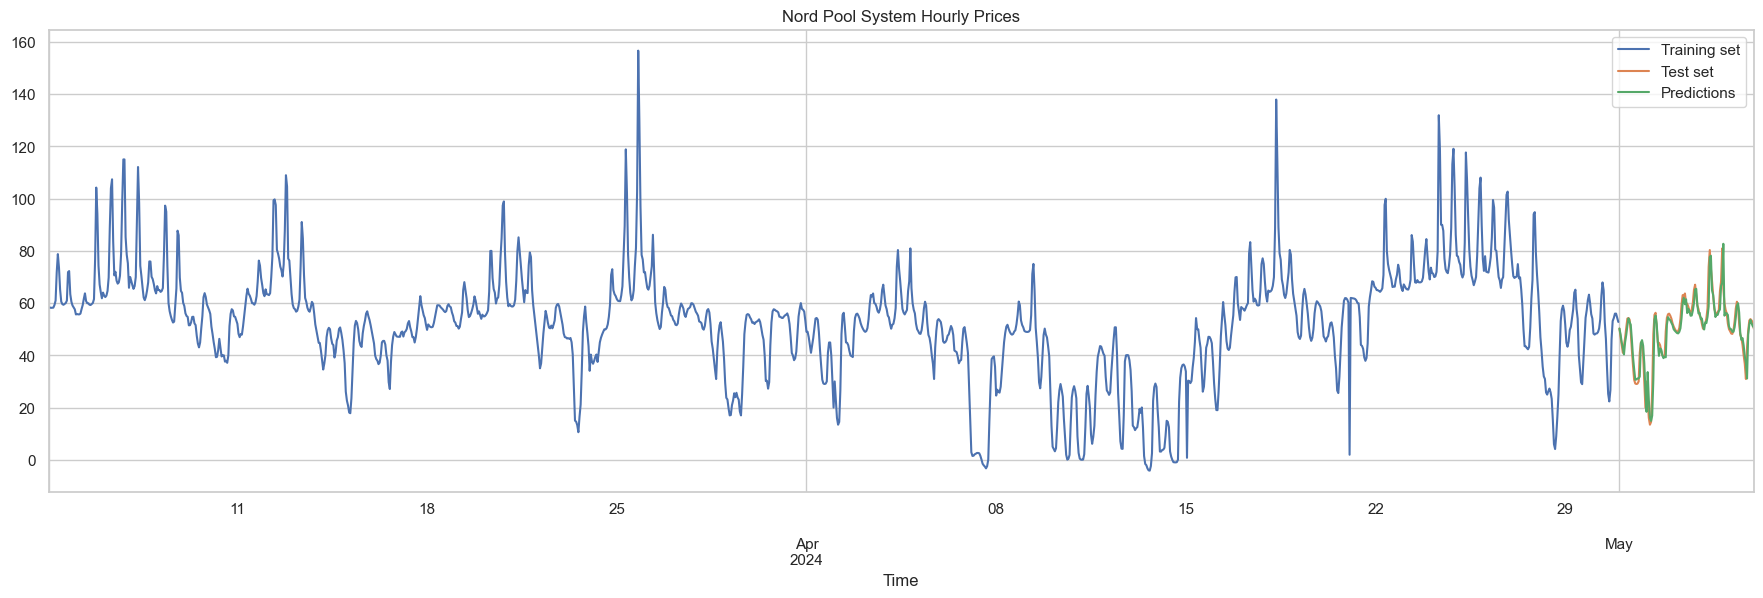

In [27]:
# Visualise whole data
data["Price"][:'2024-04-30'].plot(figsize=(22,6), legend=True)
data["Price"]['2024-05-01':].plot(figsize=(22,6), legend=True)
predictions_series.plot(figsize=(22,6), legend=True)
plt.legend(["Training set", "Test set", "Predictions"])
plt.title("Nord Pool System Hourly Prices")
plt.show()